BeautifulSoup and Request

In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import os


url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
'start':'1',
'limit':'100',
'convert':'USD'
}
headers = {
'Accepts': 'application/json',
'X-CMC_PRO_API_KEY': '66b66fa9-77d6-4dae-875f-3a878547e5c3',
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

if not os.path.isfile(r'E:\DataEngineer\ScrapData\API.csv'):
    df.to_csv(r'E:\DataEngineer\ScrapData\Cryptocurrentcy.csv', header='column_names')
else:
    df.to_csv(r'E:\DataEngineer\ScrapData\Cryptocurrentcy.csv',mode='a',header=False)



In [ ]:

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

df4 = df3.stack()
df5 = df4.to_frame(name='values')
df6 = df5.reset_index()

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7
#df7.query("name == 'Bitcoin'")

In [ ]:
print(df)

In [4]:
  
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '66b66fa9-77d6-4dae-875f-3a878547e5c3',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2024-10-05T14:47:10.407Z', 'error_code': 0, 'error_message': None, 'elapsed': 41, 'credit_count': 1, 'notice': None, 'total_count': 9848}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11755, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [5]:
print(data)
type(data)

{'status': {'timestamp': '2024-10-05T14:47:10.407Z', 'error_code': 0, 'error_message': None, 'elapsed': 41, 'credit_count': 1, 'notice': None, 'total_count': 9848}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11755, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

dict

In [31]:
import pandas as pd

pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)

In [7]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

    # df2 = pd.json_normalize(data['data'])
    # df2['timestamp'] = pd.to_datetime('now')
    # df_append = pd.DataFrame(df2)
    # df = pd.concat([df2,df_append])

In [8]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
    }
    headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '66b66fa9-77d6-4dae-875f-3a878547e5c3',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'E:\DataEngineer\ScrapData\API.csv'):
        df.to_csv(r'E:\DataEngineer\ScrapData\API.csv', header='column_names')
    else:
        df.to_csv(r'E:\DataEngineer\ScrapData\API.csv',mode='a',header=False)


In [45]:
import os
from time import time
from time import sleep

for i in range(6):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()


API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


In [9]:

import pandas as pd
df72 = pd.read_csv(r'E:\DataEngineer\ScrapData\API.csv')
df72


,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,...,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11755,2010-07-13T00:00:00.000Z,...,2024-10-05T12:35:00.000Z,NaN,NaN,NaN,NaN,NaN,36:54.7
1,1,1027,Ethereum,ETH,ethereum,9376,2015-08-07T00:00:00.000Z,...,2024-10-05T12:34:00.000Z,NaN,NaN,NaN,NaN,NaN,36:54.7
2,2,825,Tether USDt,USDT,tether,99413,2015-02-25T00:00:00.000Z,...,2024-10-05T12:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,36:54.7
3,3,5426,Solana,SOL,solana,749,2020-04-10T00:00:00.000Z,...,2024-10-05T12:34:00.000Z,NaN,NaN,NaN,NaN,NaN,36:54.7
4,4,3408,USDC,USDC,usd-coin,22298,2018-10-08T00:00:00.000Z,...,2024-10-05T12:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,36:54.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10280,10,2010,Cardano,ADA,cardano,1261,2017-10-01T00:00:00.000Z,...,2024-10-05T14:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 21:39:29.357799
10281,11,5805,Avalanche,AVAX,avalanche,784,2020-07-13T00:00:00.000Z,...,2024-10-05T14:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 21:39:29.357799
10282,12,5994,Shiba Inu,SHIB,shiba-inu,882,2020-08-01T00:00:00.000Z,...,2024-10-05T14:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,2024-10-05 21:39:29.357799
10283,13,1975,Chainlink,LINK,chainlink,1852,2017-09-20T00:00:00.000Z,...,2024-10-05T14:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2024-10-05 21:39:29.357799


In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,...,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11755,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",...,2024-10-05T14:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 21:47:22.169875
1,1027,Ethereum,ETH,ethereum,9376,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",...,2024-10-05T14:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 21:47:22.169875
2,825,Tether USDt,USDT,tether,99416,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",...,2024-10-05T14:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-05 21:47:22.169875
3,5426,Solana,SOL,solana,749,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",...,2024-10-05T14:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 21:47:22.169875
4,3408,USDC,USDC,usd-coin,22298,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",...,2024-10-05T14:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-05 21:47:22.169875
5,1839,BNB,BNB,bnb,2252,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",...,2024-10-05T14:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 21:47:22.169875
6,52,XRP,XRP,xrp,1400,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",...,2024-10-05T14:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 21:47:22.169875
7,74,Dogecoin,DOGE,dogecoin,1076,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",...,2024-10-05T14:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 21:47:22.169875
8,11419,Toncoin,TON,toncoin,570,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",...,2024-10-05T14:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 21:47:22.169875
9,1958,TRON,TRX,tron,1043,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",...,2024-10-05T14:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 21:47:22.169875


In [50]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.003680,1.736276,-5.451515,9.015804,10.413134,9.526182
Ethereum,0.062842,2.129090,-9.632437,0.640081,-4.892794,-18.541293
Tether USDt,-0.004612,0.037046,-0.013420,-0.082924,-0.034328,0.037556
Solana,-0.205210,2.603840,-9.546387,6.959279,-1.729154,4.516880
USDC,-0.003974,0.015513,0.013019,0.046411,0.001675,0.018966
BNB,0.057344,2.483938,-6.753483,10.781233,14.663904,13.177477
XRP,-0.196896,2.174166,-14.520139,-4.119935,3.016140,25.011419
Dogecoin,0.013390,1.808246,-15.655338,10.683555,10.492826,2.965646
Toncoin,-0.055588,-0.223068,-8.852138,13.925840,-5.215733,-26.958144


In [51]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.003680
              quote.USD.percent_change_24h     1.736276
              quote.USD.percent_change_7d     -5.451515
              quote.USD.percent_change_30d     9.015804
              quote.USD.percent_change_60d    10.413134
                                                ...    
Bitcoin Cash  quote.USD.percent_change_24h     0.883490
              quote.USD.percent_change_7d     -8.099259
              quote.USD.percent_change_30d     4.094139
              quote.USD.percent_change_60d     0.328130
              quote.USD.percent_change_90d     2.067133
Length: 90, dtype: float64

In [52]:
type(df4)

pandas.core.series.Series

In [53]:
df5 = df4.to_frame(name='values')
df5

values
name                                                
Bitcoin      quote.USD.percent_change_1h    0.003680
             quote.USD.percent_change_24h   1.736276
             quote.USD.percent_change_7d   -5.451515
             quote.USD.percent_change_30d   9.015804
             quote.USD.percent_change_60d  10.413134
...                                              ...
Bitcoin Cash quote.USD.percent_change_24h   0.883490
             quote.USD.percent_change_7d   -8.099259
             quote.USD.percent_change_30d   4.094139
             quote.USD.percent_change_60d   0.328130
             quote.USD.percent_change_90d   2.067133

[90 rows x 1 columns]

In [54]:
type(df5)

pandas.core.frame.DataFrame

In [49]:
df5.count()

values    29736
dtype: int64

In [55]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.003680
1,Bitcoin,quote.USD.percent_change_24h,1.736276
2,Bitcoin,quote.USD.percent_change_7d,-5.451515
3,Bitcoin,quote.USD.percent_change_30d,9.015804
4,Bitcoin,quote.USD.percent_change_60d,10.413134
...,...,...,...
85,Bitcoin Cash,quote.USD.percent_change_24h,0.883490
86,Bitcoin Cash,quote.USD.percent_change_7d,-8.099259
87,Bitcoin Cash,quote.USD.percent_change_30d,4.094139
88,Bitcoin Cash,quote.USD.percent_change_60d,0.328130


In [56]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.003680
1,Bitcoin,quote.USD.percent_change_24h,1.736276
2,Bitcoin,quote.USD.percent_change_7d,-5.451515
3,Bitcoin,quote.USD.percent_change_30d,9.015804
4,Bitcoin,quote.USD.percent_change_60d,10.413134
...,...,...,...
85,Bitcoin Cash,quote.USD.percent_change_24h,0.883490
86,Bitcoin Cash,quote.USD.percent_change_7d,-8.099259
87,Bitcoin Cash,quote.USD.percent_change_30d,4.094139
88,Bitcoin Cash,quote.USD.percent_change_60d,0.328130


In [57]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.003680
1,Bitcoin,24h,1.736276
2,Bitcoin,7d,-5.451515
3,Bitcoin,30d,9.015804
4,Bitcoin,60d,10.413134
...,...,...,...
85,Bitcoin Cash,24h,0.883490
86,Bitcoin Cash,7d,-8.099259
87,Bitcoin Cash,30d,4.094139
88,Bitcoin Cash,60d,0.328130


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

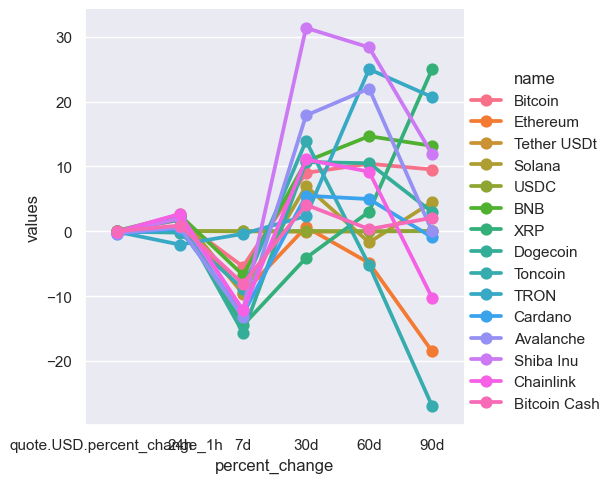

In [27]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [36]:
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.003680
1,Bitcoin,24h,1.736276
2,Bitcoin,7d,-5.451515
3,Bitcoin,30d,9.015804
4,Bitcoin,60d,10.413134
...,...,...,...
85,Bitcoin Cash,24h,0.883490
86,Bitcoin Cash,7d,-8.099259
87,Bitcoin Cash,30d,4.094139
88,Bitcoin Cash,60d,0.328130


In [58]:
df7.query("name == 'Bitcoin'")

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.003680
1,Bitcoin,24h,1.736276
2,Bitcoin,7d,-5.451515
3,Bitcoin,30d,9.015804
4,Bitcoin,60d,10.413134
5,Bitcoin,90d,9.526182


In [59]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want
df10 = df72[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10
#df10.to_csv(r'E:\DataEngineer\ScrapData\DF10.csv', header='column_names')

,name,quote.USD.price,timestamp
0,Bitcoin,62275.312940,36:54.7
5000,Bitcoin,62278.620610,37:57.9
10000,Bitcoin,62307.920230,10:25.0
10015,Bitcoin,62312.666100,11:25.8
10030,Bitcoin,62293.394140,12:26.6
...,...,...,...
10210,Bitcoin,62164.619485,2024-10-05 21:35:25.961031
10225,Bitcoin,62149.709524,2024-10-05 21:36:26.773165
10240,Bitcoin,62158.275934,2024-10-05 21:37:27.596065
10255,Bitcoin,62158.275934,2024-10-05 21:38:28.386311


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

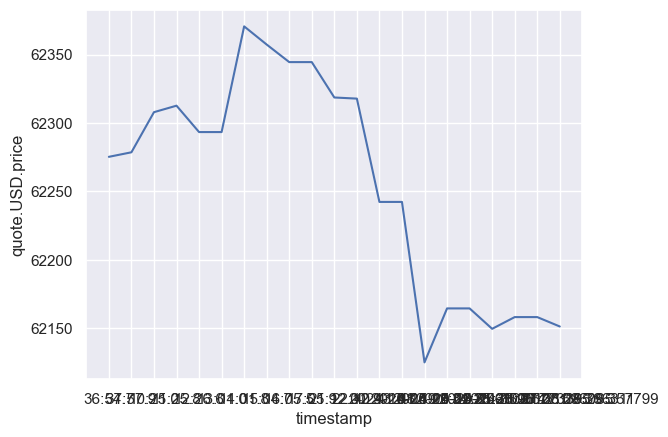

In [60]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)